In [57]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [58]:
#load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
print(x_train.shape)

(60000, 28, 28)


In [60]:
# plt.imshow(x_train[10])

In [61]:
#Normalization
x_train = x_train/255.0
x_test = x_test/255.0
# x_train[0]

In [62]:
# Reshape the input data to 1D (flatten each image of size 28x28)
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

In [63]:
num_labels = len(np.unique(y_train))
num_labels

10

In [64]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [65]:
#Model Building
# model = Sequential()
# model.add(Flatten(input_shape=(28*28,)))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# model.summary()

In [66]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [67]:
#Model Building
model = Sequential()
model.add(Dense(hidden_units, input_shape=(28*28,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
from tensorflow.keras.optimizers import SGD
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001),
    metrics = ['accuracy']
)

In [70]:
model.fit(x_train, y_train, validation_split = 0.2, epochs = 30,batch_size=batch_size )

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1580 - loss: 2.2613 - val_accuracy: 0.4557 - val_loss: 2.0863
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3897 - loss: 2.0598 - val_accuracy: 0.6319 - val_loss: 1.8662
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5505 - loss: 1.8496 - val_accuracy: 0.7101 - val_loss: 1.6312
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6323 - loss: 1.6297 - val_accuracy: 0.7613 - val_loss: 1.3988
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6843 - loss: 1.4202 - val_accuracy: 0.7928 - val_loss: 1.1925
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7106 - loss: 1.2389 - val_accuracy: 0.8103 - val_loss: 1.0251
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7408 - loss: 1.0860 - val_accuracy: 0.8273 - val_loss: 0.8956
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7616 - loss: 0.9720 - val_accuracy: 

In [123]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8827 - loss: 0.4193
Test accuracy: 0.9007999897003174, Test loss: 0.3610610067844391


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 800x600 with 0 Axes>

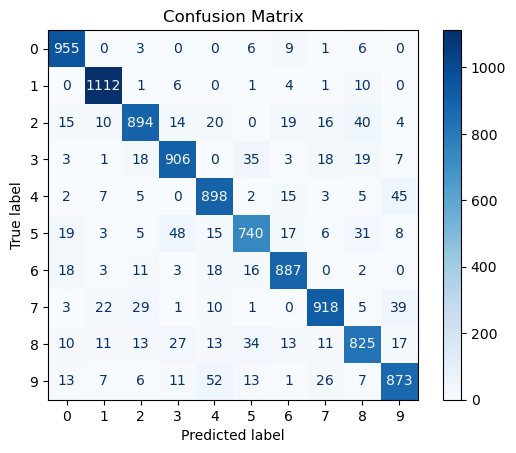

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10)).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

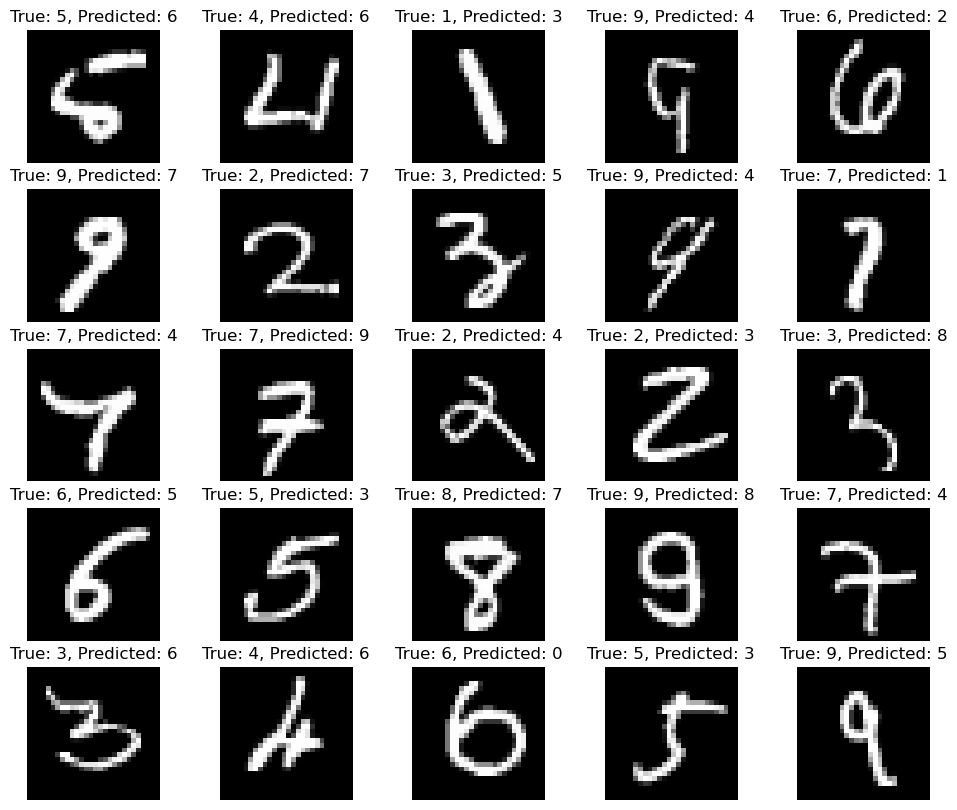

In [125]:
# Example of inspecting misclassified images
misclassified_idx = np.where(y_pred_classes != y_true)[0]

# Plot some examples of misclassified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(misclassified_idx[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true[idx]}, Predicted: {y_pred_classes[idx]}')
    plt.axis('off')
plt.show()

In [126]:
from tensorflow.keras.preprocessing import image
def load_and_preprocess_image(image_paths):
    # Load the images from file
    imgs = [image.load_img(image_path, color_mode='grayscale', target_size=(28, 28)) for image_path in image_paths]
    
    # Convert images to numpy arrays
    img_arrays = [image.img_to_array(img) for img in imgs]
    
    # Convert list of arrays to single numpy array
    img_array = np.array(img_arrays)
    
    # Flatten the images to match the input shape of the model
    img_array = img_array.reshape((-1, 784))  # -1 will be inferred based on number of images
    img_array = img_array / 255.0
    
    return img_array, imgs

In [127]:
def predict_images(model, img_array):
    predictions = model.predict(img_array)
    predicted_classes = np.argmax(predictions, axis=1)
    
    return predicted_classes, predictions

In [128]:
def plot_images_with_predictions(image_paths, model):
    img_array, imgs = load_and_preprocess_image(image_paths)
    predicted_classes, predictions = predict_images(model, img_array)
    fig, axs = plt.subplots(1, len(image_paths), figsize=(15, 5))
    for i, (img, predicted_class) in enumerate(zip(imgs, predicted_classes)):
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f'Predicted Number: {predicted_class}')
    
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


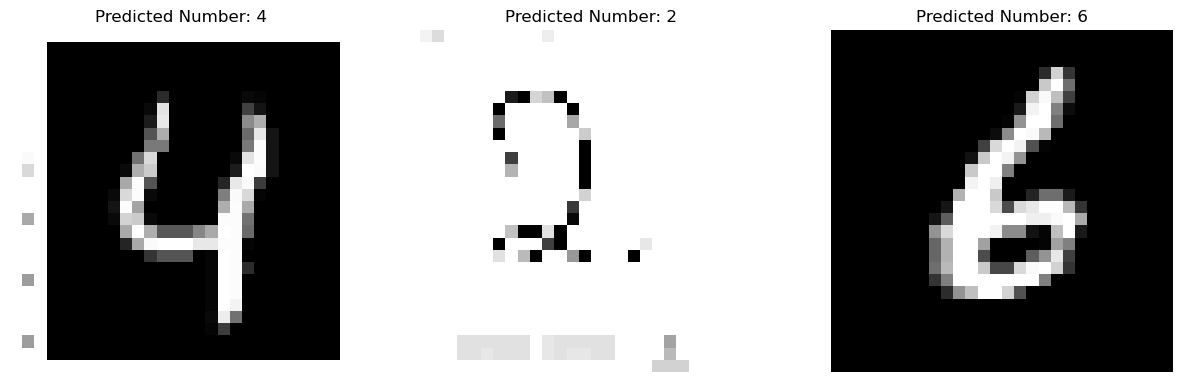

In [132]:
# Example usage
image_paths = [r'D:\Intellipat\datasets\New folder\Number_4.png',
               r'D:\Intellipat\datasets\New folder\Number_2.png',
               r'D:\Intellipat\datasets\New folder\Number_6.png']

# Assuming `model` is already defined and trained
plot_images_with_predictions(image_paths, model)